<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Kaggle_Predict_the_Severity_Grading_of_Knee_Osteoarthritis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

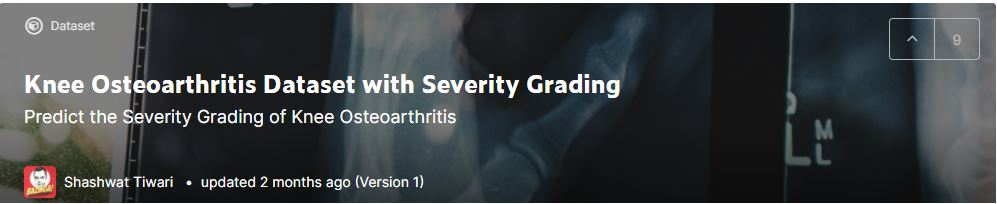

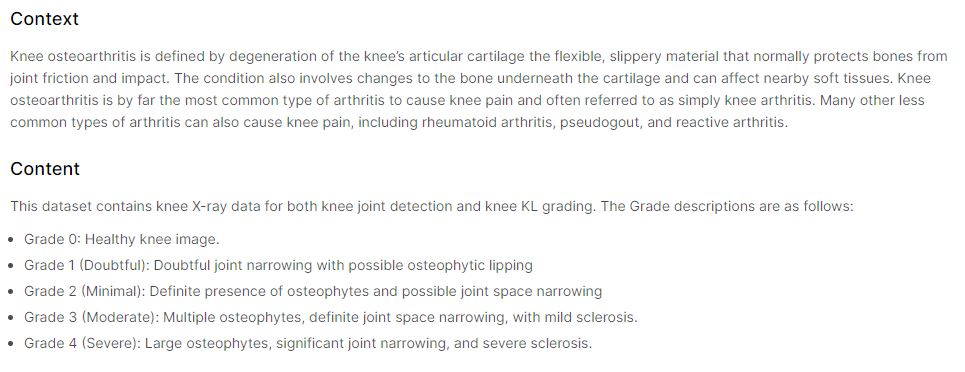

## Download Data from Kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"plabannayak","key":"d61acf0f28316eb769f6277166dc52bd"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 ! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-05-29 17:43:56           6273  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           3585  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1247  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1989  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle datasets download -d shashwatwork/knee-osteoarthritis-dataset-with-severity

100% 203M/204M [00:08<00:00, 14.7MB/s]
100% 204M/204M [00:08<00:00, 24.5MB/s]


## Mount Drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Download Competition Data

In [2]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1NdDqPK4NLn2aV8ZdF5ilux1sfG6IyebC',
                                    dest_path='content/KneeXray.zip',
                                    unzip=True)

Unzipping...Done.


## unzip Data

In [ ]:
!unzip "/content/knee-osteoarthritis-dataset-with-severity.zip" -d "/content/drive/MyDrive/Knee"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Knee/train/0/9684605R.png  
  inflating: /content/drive/MyDrive/Knee/train/0/9685238L.png  
  inflating: /content/drive/MyDrive/Knee/train/0/9685238R.png  
  inflating: /content/drive/MyDrive/Knee/train/0/9686617L.png  
  inflating: /content/drive/MyDrive/Knee/train/0/9686617R.png  
  inflating: /content/drive/MyDrive/Knee/train/0/9686777R.png  
  inflating: /content/drive/MyDrive/Knee/train/0/9686834L.png  
  inflating: /content/drive/MyDrive/Knee/train/0/9686834R.png  
  inflating: /content/drive/MyDrive/Knee/train/0/9686908L.png  
  inflating: /content/drive/MyDrive/Knee/train/0/9686908R.png  
  inflating: /content/drive/MyDrive/Knee/train/0/9687273L.png  
  inflating: /content/drive/MyDrive/Knee/train/0/9689906R.png  
  inflating: /content/drive/MyDrive/Knee/train/0/9690910L.png  
  inflating: /content/drive/MyDrive/Knee/train/0/9690910R.png  
  inflating: /content/drive/MyDrive/Knee/train/0/9691

##Setting Path

In [3]:
image_path = "/content/drive/MyDrive/Knee"
train_path = "/content/drive/MyDrive/Knee/train"
test_path = "/content/drive/MyDrive/Knee/test"
val_path = "/content/drive/MyDrive/Knee/val"

## Import Necessary Libraries

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
#
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
#
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
sns.set_style('darkgrid')
#
import os
import shutil
import cv2
import glob
from tqdm.notebook import tqdm
from tqdm import tqdm
from PIL import Image
#
from IPython.core.display import display, HTML

## Loading Data

In [ ]:
train_data = glob.glob('/content/drive/MyDrive/Knee/train/**/*.png')
test_data = glob.glob('/content/drive/MyDrive/Knee/test/**/*.png')
val_data = glob.glob('/content/drive/MyDrive/Knee/val/**/*.png')

print(f"Training Set has: {len(train_data)} images")
print(f"Testing Set has: {len(test_data)} images")
print(f"Validation Set has: {len(val_data)} images")

Training Set has: 5778 images
Testing Set has: 1656 images
Validation Set has: 826 images


##Data Distribution

In [ ]:
DIR = "/content/drive/MyDrive/Knee/"
sets = ["train", "test", "val"]
all_0 = []
all_1 = []
all_2 = []
all_3 = []
all_4 = []

for cat in sets:
    path = os.path.join(DIR, cat)
    path0 = glob.glob(os.path.join(path, "0/*.png"))
    path1 = glob.glob(os.path.join(path, "1/*.png"))
    path2 = glob.glob(os.path.join(path, "2/*.png"))
    path3 = glob.glob(os.path.join(path, "3/*.png"))
    path4 = glob.glob(os.path.join(path, "4/*.png"))
    all_0.extend(path0)
    all_1.extend(path1)
    all_2.extend(path2)
    all_3.extend(path3)
    all_4.extend(path4)
 
    

print(f"Total Label 0 Images: {len(all_0)}")
print(f"Total Label 1 Images: {len(all_1)}")
print(f"Total Label 2 Images: {len(all_2)}")
print(f"Total Label 3 Images: {len(all_3)}")
print(f"Total Label 4 Images: {len(all_4)}")



Total Label 0 Images: 3253
Total Label 1 Images: 1495
Total Label 2 Images: 2175
Total Label 3 Images: 1086
Total Label 4 Images: 251


## Label Categories Visualization

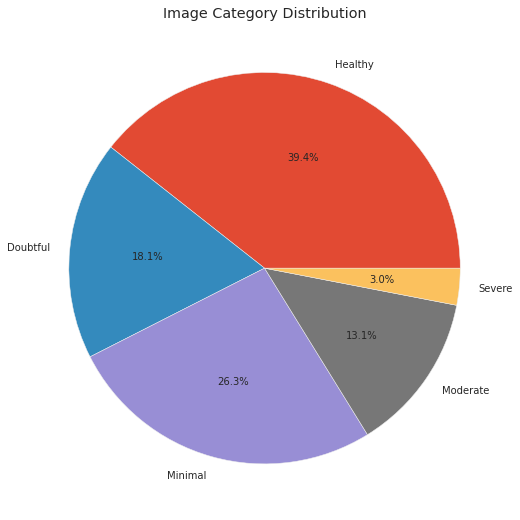

In [ ]:
labels = ['Healthy', 'Doubtful','Minimal','Moderate','Severe']
targets = [len(all_0), len(all_1),len(all_2),len(all_3),len(all_4)]

plt.style.use("ggplot")
plt.figure(figsize=(16, 9))
plt.pie(x=targets, labels=labels, autopct="%1.1f%%")
plt.title("Image Category Distribution")
plt.show()

## Function to Preprocess Images

In [7]:
def preProcess_Image(image):
  img = cv2.imread(image)
  img = cv2.resize(img, (512, 512))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
  #img = cv2.Canny(img, 80, 100)
  kernel = np.ones((5, 5), np.uint8)
  img = cv2.erode(img, kernel, iterations=3)
  return img

In [9]:
image = preProcess_Image("/content/drive/MyDrive/Knee/train/Doubtful/9000622R.png")
image.shape

(512, 512, 3)

## Function to Visualize Images

In [10]:
def show_image(image):
  f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,10))
  orig_img = cv2.imread(image)
  orig_img = cv2.resize(orig_img, (512, 512))
  processed_img =  preProcess_Image(image)
  ax1.imshow(orig_img)
  ax2.imshow(processed_img)
  ax1.set_title('Original Image')
  ax2.set_title('Processed Image')

## Visualize some Sample Images

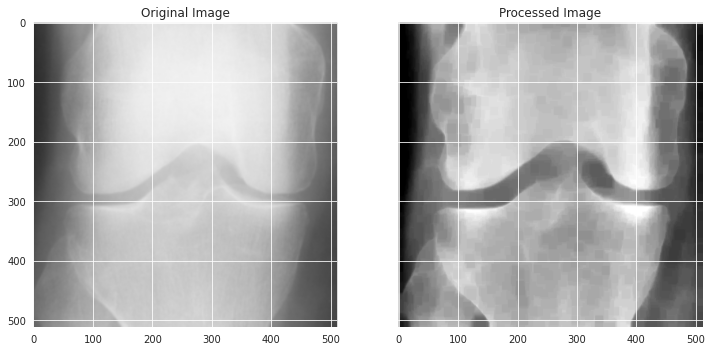

In [11]:
show_image("/content/drive/MyDrive/Knee/train/Doubtful/9000622R.png")

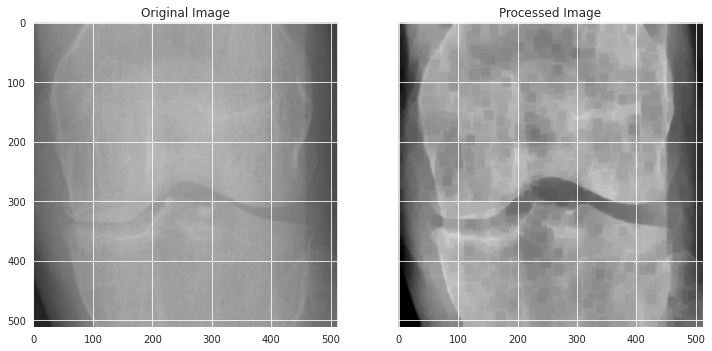

In [12]:
show_image("/content/drive/MyDrive/Knee/train/Moderate/9011918L.png")

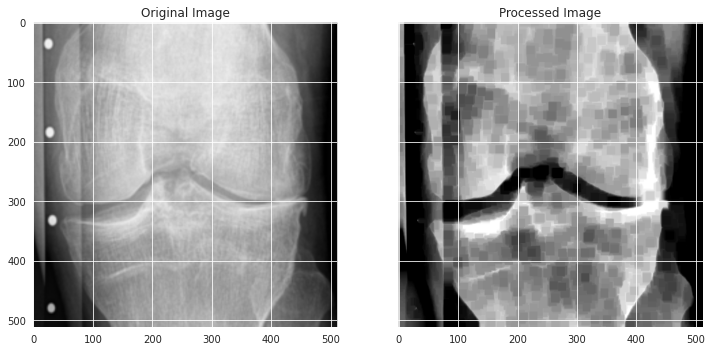

In [13]:
show_image("/content/drive/MyDrive/Knee/train/Severe/9065272L.png")

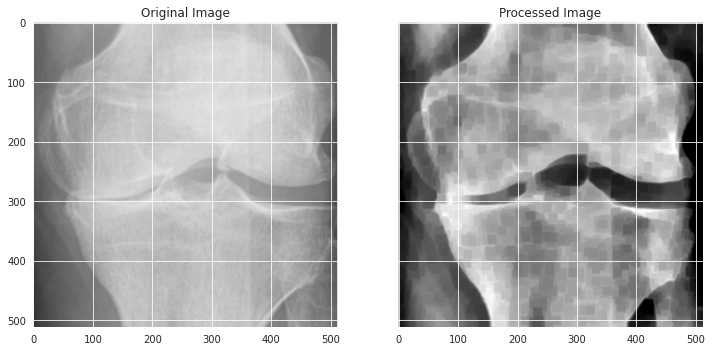

In [14]:
show_image("/content/drive/MyDrive/Knee/train/Severe/9103783L.png")

## Read TRain.CSV from the competition data and load it into validation dataframe

In [15]:
valid_df = pd.read_csv("/content/content/KneeXray/Train.csv")

In [16]:
valid_df.head()

,filename,label
0,Image_1.jpg,0
1,Image_2.jpg,1
2,Image_3.jpg,0
3,Image_4.jpg,1
4,Image_5.jpg,2


In [18]:
valid_df.shape

(7828, 2)

## Combine all the images from train test and validation folders into a single image and folder list and create a dataframe

In [5]:
# number of class
n_class = 5

# path to kaggle dataset
root_path = "/content/drive/MyDrive/Knee/"

# list of folders
folder_list = os.listdir(root_path)
image_path_list = []
label_list = []

# for each folder, get the image path and labels
for folder in folder_list:
    for label in range(n_class):
        
        # get all the images path inside the current folder
        image_list = os.listdir(f"{root_path}{folder}/{label}")
        # add to the image path list
        image_path_list += [ f"{root_path}{folder}/{label}/"+ path for path in image_list]
        
        # add labels to the label list
        label_list += [label] * len(image_list)

# convert to dataframe
df_train_kaggle = pd.DataFrame({"filepath" : image_path_list, "label": label_list})
df_train_kaggle.shape

(9786, 2)

In [6]:
df_train_kaggle.head()

,filepath,label
0,/content/drive/MyDrive/Knee/auto_test/0/906216...,0
1,/content/drive/MyDrive/Knee/auto_test/0/904346...,0
2,/content/drive/MyDrive/Knee/auto_test/0/900418...,0
3,/content/drive/MyDrive/Knee/auto_test/0/902440...,0
4,/content/drive/MyDrive/Knee/auto_test/0/902393...,0


In [108]:
df_train_kaggle.label.value_counts()

0    3857
2    2578
1    1770
3    1286
4     295
Name: label, dtype: int64

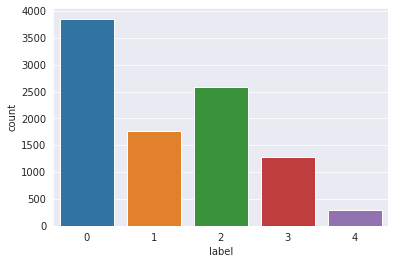

In [109]:
sns.countplot(x='label',data=df_train_kaggle)

## Set Training Parameters

In [1]:
batch_size=32
image_shape=(224,224)
class_mode='raw'

## Image Generator preprocess function

In [8]:
def preProcess_Imagegen(image):
  img = cv2.resize(image, (224, 224))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
  #img = cv2.Canny(img, 80, 100)
  kernel = np.ones((5, 5), np.uint8)
  img = cv2.erode(img, kernel, iterations=3)
  return img

In [41]:
generator = ImageDataGenerator(        rescale=1./255,
                                       #preprocessing_function=preProcess_Imagegen,
                                       #samplewise_center = True,
                                       #samplewise_std_normalization = True,   
                                      #rotation_range=10,
                                      #width_shift_range=0.2,
                                      #height_shift_range=0.2,
                                      #shear_range=0.1,
                                      #zoom_range=0.2,
                                      #horizontal_flip=True,
                                        #vertical_flip=False,
                                      #fill_mode='nearest'
                                        )


# Train data generator
train_datagenerator = generator.flow_from_dataframe(
dataframe=df_train_kaggle,
x_col="filepath",
y_col="label",
dir=None,
batch_size=batch_size,
seed=42,
shuffle=True,
class_mode=class_mode,
target_size=image_shape)

Found 9786 validated image filenames.


## Visualize Train Image Augmentations with Samplewise Std Normalization

(224, 224, 3)
(224, 224, 3)


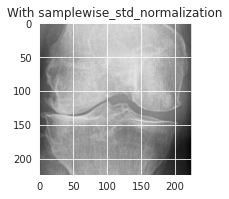

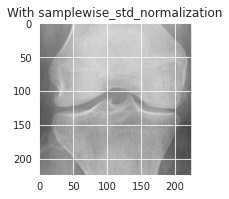

In [42]:
x,y = train_datagenerator.next()
for i in range(2):
    image = x[i]
    plt.figure(figsize=(6,8))
    plt.subplot(1,2,i+1)
    plt.imshow(image)
    plt.title(f'With samplewise_std_normalization')
    print(image.shape)
   
plt.show()

## Visualize Train Image Augmentations without Samplewise Std Normalization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)
(512, 512, 3)


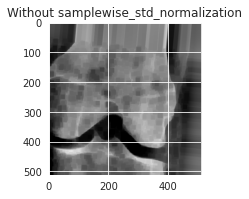

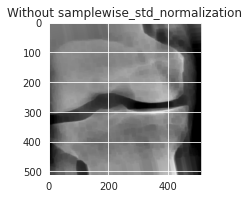

In [ ]:
x,y = train_datagenerator.next()
for i in range(2):
    image = x[i]
    plt.figure(figsize=(6,8))
    plt.subplot(1,2,i+1)
    plt.imshow(image)
    plt.title(f'Without samplewise_std_normalization for label {labels_dict[np.argmax(y[i])]}')
    print(image.shape)
   
plt.show()

## Create validation dataframe using compitition dataset.

In [13]:
df_valid = pd.read_csv("/content/content/KneeXray/Train.csv")
df_valid.head()

,filename,label
0,Image_1.jpg,0
1,Image_2.jpg,1
2,Image_3.jpg,0
3,Image_4.jpg,1
4,Image_5.jpg,2


In [14]:
df_valid['filename'] = df_valid['filename'].apply(lambda x : "/content/content/KneeXray/train/" +x )
df_valid.head()

,filename,label
0,/content/content/KneeXray/train/Image_1.jpg,0
1,/content/content/KneeXray/train/Image_2.jpg,1
2,/content/content/KneeXray/train/Image_3.jpg,0
3,/content/content/KneeXray/train/Image_4.jpg,1
4,/content/content/KneeXray/train/Image_5.jpg,2


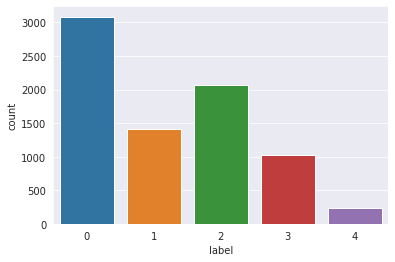

In [15]:
sns.countplot(x='label',data=df_valid)

## Validation Data Generator

In [43]:
# Validation data generator
valid_datagenerator = generator.flow_from_dataframe(
dataframe=df_valid,
x_col="filename",
y_col="label",
batch_size=batch_size,
seed=42,
shuffle=True,
class_mode=class_mode,
target_size=image_shape)

Found 7828 validated image filenames.


In [73]:
labels_dict = {0:'Doubtful',1:'Healthy',2:'Minimal',3:'Moderate',4:'Severe'}

## Visualize validation Image Augmentations with Samplewise Std Normalization

(224, 224, 3)
(224, 224, 3)


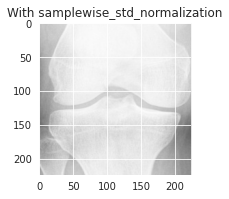

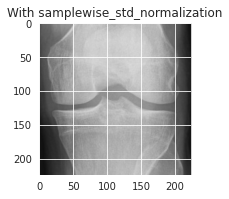

In [44]:
x,y = valid_datagenerator.next()
for i in range(2):
    image = x[i]
    plt.figure(figsize=(6,8))
    plt.subplot(1,2,i+1)
    plt.imshow(image)
    plt.title(f'With samplewise_std_normalization')
    print(image.shape)
   
plt.show()

In [75]:
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

## Callbacks

In [30]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                 factor = 0.2,
                                                 patience = 2,
                                                 verbose = 1,
                                                 min_delta = 1e-4,
                                                 min_lr = 1e-6,
                                                 mode = 'max')

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                 min_delta = 1e-4,
                                                 patience = 5,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = './model.hdf5',
                                                  monitor = 'val_accuracy', 
                                                  verbose = 1, 
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  mode = 'max')

callbacks = [reduce_lr, checkpointer]


## Model Building

In [ ]:
height=512
width=512
img_shape=(height, width, 3)
dropout=.3
lr=.001
img_shape=(height, width, 3)
base_model=tf.keras.applications.InceptionResNetV2( include_top=False, input_shape=img_shape, pooling='max', weights='imagenet') 
x=base_model.output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(512, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu', kernel_initializer= tf.keras.initializers.GlorotUniform(seed=123))(x)
x=Dropout(rate=dropout, seed=123)(x)        
output=Dense(5, activation='softmax',kernel_initializer=tf.keras.initializers.GlorotUniform(seed=123))(x)
model=Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy',get_f1]) 

In [45]:
xception = tf.keras.applications.DenseNet201(weights="imagenet",)
x=  xception.layers[-3].output

x = tf.keras.layers.Conv2D(filters= 1024, kernel_size= 3, padding= "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters= 256, kernel_size= 3, padding= "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters= 64, kernel_size= 3, padding= "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters= 5, kernel_size= 3, padding= "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

GAP = tf.keras.layers.GlobalAveragePooling2D()(x)
pred = tf.keras.activations.softmax(GAP)

xception_model = Model(inputs=xception.input,outputs=pred)

In [46]:
# compile
xception_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001,decay=0.0001),
                 metrics=['accuracy'],
                 loss= tf.keras.losses.sparse_categorical_crossentropy)


## Genreart Class weights for imbalanced dataset in case we have labels as folders

In [80]:
from collections import Counter
counter = Counter(train_datagenerator.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}   
print("\nThe class weights are : \n\n", class_weights)

AttributeError: ignored

In [47]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes= np.unique(df_train_kaggle.label.values),
                                                 y= df_train_kaggle.label.values)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.5074410163339383,
 1: 1.1057627118644069,
 2: 0.7591931730023274,
 3: 1.5219284603421461,
 4: 6.63457627118644}

In [48]:
xception_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [49]:
STEP_SIZE_TRAIN=train_datagenerator.n//train_datagenerator.batch_size
STEP_SIZE_VALID=valid_datagenerator.n//valid_datagenerator.batch_size

In [50]:
history=xception_model.fit(train_datagenerator , 
                  epochs=20, 
                  steps_per_epoch = STEP_SIZE_TRAIN,
                  validation_data= valid_datagenerator , 
                  validation_steps = STEP_SIZE_VALID,
                  callbacks=callbacks, 
                  verbose=1, 
                  class_weight=class_weights)

Epoch 1/20
305/305 [==============================] - 143s 409ms/step - loss: 1.4081 - accuracy: 0.3328 - val_loss: 1.5452 - val_accuracy: 0.3007

Epoch 00001: val_accuracy did not improve from 0.53906
Epoch 2/20
305/305 [==============================] - 122s 399ms/step - loss: 1.1269 - accuracy: 0.5252 - val_loss: 1.4248 - val_accuracy: 0.3969

Epoch 00002: val_accuracy did not improve from 0.53906
Epoch 3/20
305/305 [==============================] - 122s 399ms/step - loss: 0.9546 - accuracy: 0.6382 - val_loss: 1.2103 - val_accuracy: 0.6163

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.9999999494757505e-06.

Epoch 00003: val_accuracy improved from 0.53906 to 0.61629, saving model to ./model.hdf5
Epoch 4/20
305/305 [==============================] - 122s 399ms/step - loss: 0.8324 - accuracy: 0.7455 - val_loss: 1.1456 - val_accuracy: 0.6562

Epoch 00004: val_accuracy improved from 0.61629 to 0.65625, saving model to ./model.hdf5
Epoch 5/20
305/305 [======================

## Retraining last trained model on competition data

As we have used competition data as validation set previously, we will use it as train set now (and some part of it as validation set) hoping this additional training would give our model new information to perform better.

In [51]:
# train and validation split on competition data
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_valid,
                                   test_size=0.1,
                                   random_state=42,
                                   stratify= df_valid.label)

In [53]:
train_generator = generator.flow_from_dataframe(
dataframe = X_train,
x_col="filename",
y_col="label",
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(224,224))

Found 7045 validated image filenames.


In [54]:
valid_generator = generator.flow_from_dataframe( 
dataframe=X_test,
x_col="filename",
y_col="label",
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(224,224))

Found 783 validated image filenames.


In [55]:
# number of steps to consider 1 as  epoch
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID =valid_generator.n//valid_generator.batch_size

In [56]:
history = xception_model.fit(
        train_generator,
        steps_per_epoch=STEP_SIZE_TRAIN,
        epochs=50,
        validation_data=valid_generator,
        validation_steps=STEP_SIZE_VALID,callbacks=callbacks)

Epoch 1/50
220/220 [==============================] - 101s 337ms/step - loss: 0.9860 - accuracy: 0.7624 - val_loss: 0.8986 - val_accuracy: 0.8112

Epoch 00001: val_accuracy improved from 0.76947 to 0.81120, saving model to ./model.hdf5
Epoch 2/50
220/220 [==============================] - 73s 330ms/step - loss: 0.9600 - accuracy: 0.7888 - val_loss: 0.8852 - val_accuracy: 0.8164

Epoch 00002: val_accuracy improved from 0.81120 to 0.81641, saving model to ./model.hdf5
Epoch 3/50
220/220 [==============================] - 73s 330ms/step - loss: 0.9282 - accuracy: 0.8106 - val_loss: 0.8929 - val_accuracy: 0.8125

Epoch 00003: val_accuracy did not improve from 0.81641
Epoch 4/50
220/220 [==============================] - 73s 330ms/step - loss: 0.9141 - accuracy: 0.8270 - val_loss: 0.8988 - val_accuracy: 0.8138

Epoch 00004: val_accuracy did not improve from 0.81641
Epoch 5/50
220/220 [==============================] - 73s 330ms/step - loss: 0.9009 - accuracy: 0.8372 - val_loss: 0.9033 - val

## Load the Best Weights

In [58]:
# load best saved weights
xception_model.load_weights("/content/model.hdf5")

## Test Data Generator

In [61]:
target_shape = 224
BATCH_SIZE = 1
# test generator
test_gen = generator.flow_from_dataframe(dataframe= X_test,
                            x_col= "filename",
                            class_mode=None,
                            target_size= (target_shape, target_shape),
                            shuffle= False,
                            batch_size= BATCH_SIZE
                            )

Found 783 validated image filenames.


## Prediction on Validation Data

In [63]:
# prediction on train data
predicition = xception_model.predict(test_gen, steps= test_gen.n/ BATCH_SIZE, verbose= 1)

783/783 [==============================] - 30s 33ms/step


In [64]:
from sklearn.metrics import confusion_matrix
class_prediction =  np.argmax(predicition, axis= 1)
cm = confusion_matrix(X_test.label, class_prediction, labels=[0, 1, 2, 3, 4])

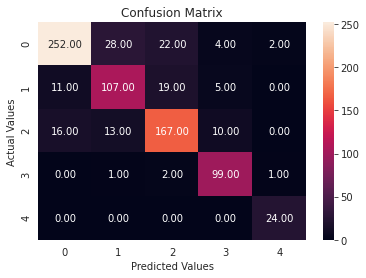

In [67]:
sns.heatmap(cm,fmt=".2f",annot=True)
plt.xlabel('Predicted Values')
plt.ylabel("Actual Values")
plt.title('Confusion Matrix')
plt.show()

##Making prediction on test set (to make submission)

In [69]:
# read the csv file
test = pd.read_csv("/content/content/KneeXray/Test.csv")

# create test generator
test_generator = generator.flow_from_dataframe(
dataframe= test,
directory= "/content/content/KneeXray/test",
x_col= "filename",
y_col= None,
batch_size= 1,
seed= 42,
shuffle= False,
class_mode= None,
target_size= (224,224))

# number of steps to consider 1 epoch
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

Found 1958 validated image filenames.


In [70]:
# make prediction and create dataframe out of it
pred = xception_model.predict(test_generator,steps=STEP_SIZE_TEST,verbose=1)
df_submit = pd.DataFrame({"label":np.argmax(pred, axis= 1)})
df_submit["label"].value_counts()

1958/1958 [==============================] - 65s 33ms/step


0    700
2    518
1    398
3    280
4     62
Name: label, dtype: int64

In [71]:
df_submit.head()

,label
0,2
1,1
2,0
3,0
4,4


## Save best weights and output prediction file

In [72]:
xception_model.save_weights("/content/drive/MyDrive/Knee/knee_xray_Densenet201_GPA.h5")
df_submit.to_csv("submission.csv",index=False)

**Submission successful! Your score is 72.11440245148111.- Keras Densenet201**

https://www.analyticsvidhya.com/blog/2021/05/neural-network-and-hyperparameter-optimization-using-talos/

https://www.kaggle.com/shashwatwork/knee-osteoarthritis-dataset-with-severity/code

https://www.kaggle.com/akashkewar/data-sprint-35-osteoarthritis-kneexray

##Fastai

In [38]:
from pathlib import Path
from fastai import *
from fastai.vision import *
import torch
#from fastai.callbacks.hooks import *
from fastai.callbacks import *
#
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix
#
import warnings
warnings.filterwarnings('ignore')

In [39]:
path ='/content/content/KneeXray/train/'
tfms = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0,do_flip=False,xtra_tfms=[cutout()])
data = (ImageList.from_csv(path, csv_name = '/content/content/KneeXray/Train_new.csv')
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '/content/content/KneeXray/test')              
        .transform(tfms, size=400)
        .databunch(num_workers=0,bs=8))

In [40]:
## print the target classes
val=data.classes
print(f"The number of target class : {data.c} and the respective target classes are a: {data.classes}")

The number of target class : 5 and the respective target classes are a: [0, 1, 2, 3, 4]


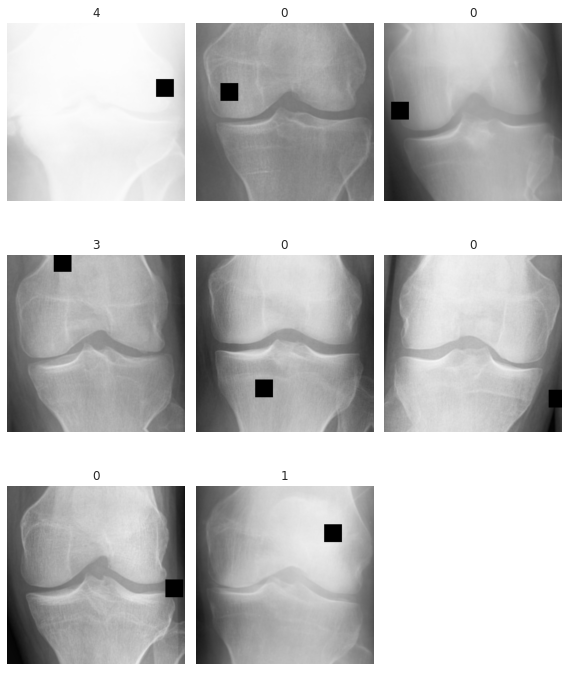

In [41]:
data.show_batch(rows=3, figsize=(8,10))

##Define F1 metrics

In [42]:
fscore = FBeta(average='macro', beta=2.0)

## Set Path

In [43]:
path= '/content/content/KneeXray/'
k= '/content/content/KneeXray/Train_new.csv'
p ='/content/content/KneeXray/Test.csv'
#
train=pd.read_csv(k)
test=pd.read_csv(p)

In [44]:
np.random.seed(1786)
ROOT = "/content/content/KneeXray/"

In [45]:
def read_data(root):
    train_df = pd.read_csv(k)
    test_df = pd.read_csv(p)
    return train_df, test_df

## Define Callback

In [46]:
class SaveBestModel(Recorder):
    def __init__(self, learn,name='best_model'):
        super().__init__(learn)
        self.name = name
        self.best_loss = None
        self.best_acc = None
        self.best_f1 = None
        self.save_method = self.save_when_acc
        
    def save_when_acc(self, metrics):        
        loss, acc,f1 = metrics[0], metrics[1],metrics[2]
        if (self.best_acc is None) or (acc > self.best_acc) or (loss < self.best_loss) or (f1 > self.best_f1):
            self.best_acc = acc
            self.best_loss = loss
            self.best_f1 = f1
            self.learn.save(f'{self.name}')
            print("Save the best acc {:.5f}".format(self.best_acc))
            print("Save the best f1 {:.5f}".format(self.best_f1))
        elif acc == self.best_acc and  loss < self.best_loss:
            self.best_loss = loss
            self.learn.save(f'{self.name}')
            print("Acc is eq,Save the lower loss {:.5f}".format(self.best_loss))
            
    def on_epoch_end(self,last_metrics=MetricsList,**kwargs:Any):
        self.save_method(last_metrics)

## Perform Training Validation and Evaluation using Densenet201 model with Cross_Validation

(16088, 2) (1958, 1)
Starting fold 0
(15082,) (1006,)


Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.458834,1.249264,0.522863,0.477137,0.396845,02:35
1,1.078226,0.986275,0.403579,0.596421,0.536666,02:33
2,0.971682,0.832471,0.361829,0.638171,0.601432,02:34
3,0.845142,0.777812,0.328032,0.671968,0.652375,02:34
4,0.817656,0.749485,0.317097,0.682903,0.661826,02:33


epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,0.819667,0.747127,0.322068,0.677932,0.679841,03:00
1,0.824898,0.738391,0.320080,0.679920,0.665568,02:59
2,0.801786,0.821466,0.357853,0.642147,0.623592,02:58
3,0.740056,0.653389,0.272366,0.727634,0.719259,02:59
4,0.695008,0.595665,0.239563,0.760437,0.769654,02:58
5,0.636125,0.536483,0.220676,0.779324,0.769742,02:58
6,0.563053,0.469626,0.175944,0.824056,0.830192,02:58
7,0.468433,0.456161,0.178926,0.821074,0.821905,02:58
8,0.385438,0.387233,0.156064,0.843936,0.856131,02:59
9,0.384843,0.376608,0.150099,0.849901,0.859271,02:59


Better model found at epoch 0 with error_rate value: 0.32206758856773376.


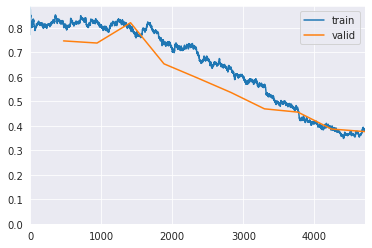

Better model found at epoch 1 with error_rate value: 0.3200795352458954.
Better model found at epoch 3 with error_rate value: 0.2723658084869385.
Better model found at epoch 4 with error_rate value: 0.23956263065338135.
Better model found at epoch 5 with error_rate value: 0.22067594528198242.
Better model found at epoch 6 with error_rate value: 0.17594432830810547.
Better model found at epoch 8 with error_rate value: 0.15606361627578735.
Better model found at epoch 9 with error_rate value: 0.15009939670562744.


epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,0.376079,0.374576,0.143141,0.856859,0.856441,02:59
1,0.403248,0.377569,0.141153,0.858847,0.871431,02:58
2,0.396549,0.391034,0.141153,0.858847,0.875407,02:59
3,0.365615,0.348326,0.128231,0.871769,0.884196,03:00
4,0.288550,0.266905,0.103380,0.896620,0.892779,02:59
5,0.259998,0.211174,0.076541,0.923459,0.933872,02:59
6,0.193209,0.164970,0.058648,0.941352,0.948001,02:59
7,0.168224,0.146902,0.055666,0.944334,0.954345,02:58
8,0.167778,0.119654,0.044732,0.955268,0.961337,02:59
9,0.131627,0.115888,0.037773,0.962227,0.968494,02:59


Better model found at epoch 0 with error_rate value: 0.14314115047454834.


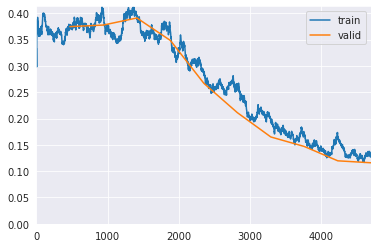

Better model found at epoch 1 with error_rate value: 0.14115308225154877.
Better model found at epoch 3 with error_rate value: 0.12823061645030975.
Better model found at epoch 4 with error_rate value: 0.10337971895933151.
Better model found at epoch 5 with error_rate value: 0.0765407532453537.
Better model found at epoch 6 with error_rate value: 0.058648113161325455.
Better model found at epoch 7 with error_rate value: 0.0556660033762455.
Better model found at epoch 8 with error_rate value: 0.044731609523296356.
Better model found at epoch 9 with error_rate value: 0.037773359566926956.


epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,0.127631,0.119427,0.040755,0.959245,0.958259,03:00
1,0.133826,0.100410,0.034791,0.965209,0.969579,03:00
2,0.120343,0.088939,0.028827,0.971173,0.977718,03:00
3,0.110142,0.091569,0.026839,0.973161,0.978606,03:01
4,0.102702,0.088807,0.024851,0.975149,0.980933,02:59


Better model found at epoch 0 with error_rate value: 0.040755465626716614.


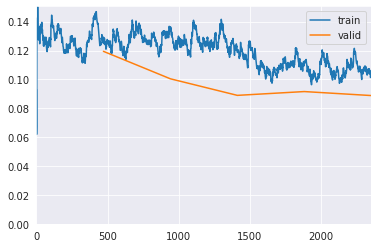

Better model found at epoch 1 with error_rate value: 0.0347912535071373.
Better model found at epoch 2 with error_rate value: 0.028827037662267685.
Better model found at epoch 3 with error_rate value: 0.026838965713977814.
Better model found at epoch 4 with error_rate value: 0.024850893765687943.


epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,0.104872,0.085051,0.024851,0.975149,0.978756,02:59
1,0.101850,0.083572,0.025845,0.974155,0.978707,02:59
2,0.103178,0.082863,0.025845,0.974155,0.979538,02:59
3,0.087644,0.080580,0.020875,0.979125,0.983572,02:59
4,0.098552,0.073880,0.018887,0.981113,0.984498,02:59
5,0.087923,0.068918,0.019881,0.980119,0.983057,02:59
6,0.085258,0.063480,0.018887,0.981113,0.984024,02:59
7,0.082358,0.066404,0.015905,0.984095,0.986522,02:59
8,0.082737,0.063027,0.016899,0.983101,0.985537,02:59
9,0.086684,0.065711,0.019881,0.980119,0.982907,02:59


Better model found at epoch 0 with error_rate value: 0.024850893765687943.


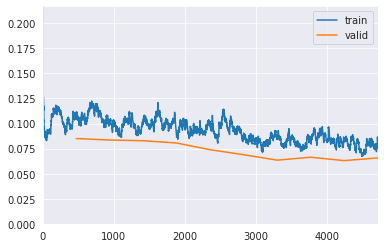

Better model found at epoch 3 with error_rate value: 0.02087475173175335.
Better model found at epoch 4 with error_rate value: 0.018886679783463478.
Better model found at epoch 7 with error_rate value: 0.01590457186102867.


epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,0.083636,0.064705,0.017893,0.982107,0.984507,02:59
1,0.084440,0.064754,0.020875,0.979125,0.981427,02:59
2,0.088223,0.061522,0.015905,0.984095,0.986901,02:59
3,0.077196,0.060387,0.016899,0.983101,0.984412,02:59
4,0.080558,0.058393,0.013917,0.986084,0.988487,02:59


Better model found at epoch 0 with error_rate value: 0.017892643809318542.


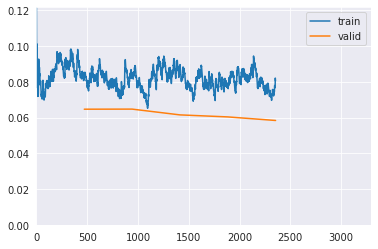

Better model found at epoch 2 with error_rate value: 0.01590457186102867.
Better model found at epoch 4 with error_rate value: 0.013916500844061375.


epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,0.083636,0.064705,0.017893,0.982107,0.984507,02:59
1,0.084440,0.064754,0.020875,0.979125,0.981427,02:59
2,0.088223,0.061522,0.015905,0.984095,0.986901,02:59
3,0.077196,0.060387,0.016899,0.983101,0.984412,02:59
4,0.080558,0.058393,0.013917,0.986084,0.988487,02:59
5,0.086886,0.060653,0.015905,0.984095,0.986900,02:58
6,0.081228,0.059776,0.013917,0.986084,0.988869,03:00


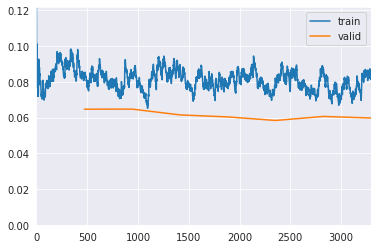

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,0.893821,0.905410,0.371769,0.628231,0.528532,03:00
1,0.972946,0.991709,0.424453,0.575547,0.470134,03:00
2,0.908953,0.748895,0.320080,0.679920,0.639490,02:59
3,0.799234,0.691519,0.298211,0.701789,0.671363,03:00
4,0.757881,0.603828,0.261431,0.738569,0.731231,02:59


Better model found at epoch 0 with error_rate value: 0.37176939845085144.


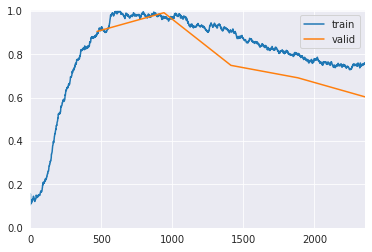

Better model found at epoch 2 with error_rate value: 0.3200795352458954.
Better model found at epoch 3 with error_rate value: 0.2982107400894165.
Better model found at epoch 4 with error_rate value: 0.26143142580986023.


F1 score for this fold  0.6729198952856738


In [47]:
if __name__=="__main__":
    train_df, test_df = read_data(ROOT)
    print(train_df.shape, test_df.shape)
    
    cvlist = list(StratifiedKFold(16, random_state=12345786).split(train_df, train_df.label))
    
    tfms1 = get_transforms(max_zoom=1.5)
    test_preds_all = []
    val_preds_all = []
    for i in range(1):
        print("Starting fold {}".format(i))
        tr_idx, val_idx = cvlist[i]
        print(tr_idx.shape, val_idx.shape)
        src = (ImageList.from_df(train_df, path=ROOT,folder="train").split_by_idxs(tr_idx, val_idx)
                                                            .label_from_df())
        data = ImageDataBunch.create_from_ll(src, ds_tfms=tfms1, size=224, bs=32, resize_method=ResizeMethod.SQUISH).normalize(imagenet_stats)
        data.add_test(ImageList.from_df(test_df, path=ROOT, folder="test"))
        #learn = cnn_learner(data, models.densenet121, metrics=accuracy, ps=0.5)
        #learn = cnn_learner(data, models.densenet121, metrics=[error_rate,accuracy,fscore], ps=0.5)
        learn = cnn_learner(data, models.densenet201, metrics=[error_rate,accuracy,fscore], ps=0.5)
        # learn.model[0].load_state_dict(torch.load("../input/save-body-weights-marvel/bestmodel_body.path"))
        #cb = SaveBestModel(learn, name="bestmodel_{}".format(i))
        cb =[SaveModelCallback(learn,monitor="error_rate",mode="min",name="bestmodel_{}".format(i)),
                               ShowGraph(learn),EarlyStoppingCallback(learn, min_delta=1e-5, patience=5),]
        # learn.fit(1, callbacks=cb)
        learn.fit_one_cycle(5)
        learn.unfreeze()
        learn.fit_one_cycle(10, max_lr=1e-4, callbacks=cb)
        learn.fit_one_cycle(10, max_lr=5e-5, callbacks=cb)
        learn.fit_one_cycle(5, max_lr=1e-5, callbacks=cb)
        learn.fit_one_cycle(10, max_lr=5e-6, callbacks=cb)
        learn.fit_one_cycle(7, max_lr=1e-6, callbacks=cb)
        learn.fit_one_cycle(5, max_lr=1e-3, callbacks=cb)
        learn.load("bestmodel_{}".format(i))
        val_preds, y = learn.TTA(ds_type=DatasetType.Valid)
        val_preds = np.exp(val_preds.numpy())
        print("F1 score for this fold ",f1_score(y.numpy(), np.argmax(val_preds,axis=1), average='weighted'))
        test_preds = np.exp(learn.TTA(ds_type=DatasetType.Test)[0].numpy())
        test_preds_all.append(test_preds)
        val_preds_all.append(val_preds)
        fname = "bestmodel_{}.pth".format(i)
        src = str(Path(ROOT) / "models" / fname)
    test_preds_all = np.mean(test_preds_all, axis=0)
    val_preds_all = np.concatenate(val_preds_all, axis=0)


In [48]:
test_preds

array([[1.208671, 1.233763, 1.810646, 1.006594, 1.000154],
       [1.967506, 1.208066, 1.140441, 1.002757, 1.000045],
       [2.012361, 1.276509, 1.052898, 1.004845, 1.000183],
       [2.141606, 1.175322, 1.075384, 1.003664, 1.000566],
       ...,
       [1.139714, 1.257587, 1.858069, 1.020242, 1.00045 ],
       [2.540674, 1.05692 , 1.011847, 1.000337, 1.000097],
       [1.127025, 1.199964, 1.440683, 1.390278, 1.003512],
       [1.793993, 1.287533, 1.110741, 1.056696, 1.002657]], dtype=float32)

In [49]:
test.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [50]:
sub = test[["filename"]]
sub["label"] = np.argmax(test_preds, axis=1)

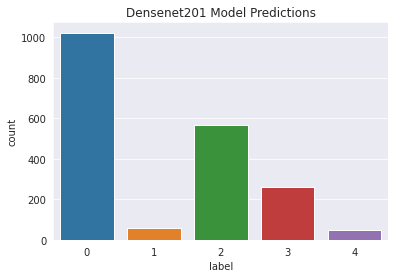

In [51]:
sns.set_style('darkgrid')
sns.countplot(x='label',data=sub)
plt.title('Densenet201 Model Predictions')
plt.show()

In [52]:
sub.to_csv("submission_densenet201_kaggle.csv", index = False)

# To download the csv file locally
from google.colab import files
files.download('submission_densenet201_kaggle.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**After Training on Kaggle data Submission successful! Your score is 72.11440245148111.**